In [1]:
# Benin Solar Data - Phase 1: Setup and Initial Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print("=== BENIN SOLAR DATA EDA ===")
print("Phase 1: Data Setup and Initial Exploration")

=== BENIN SOLAR DATA EDA ===
Phase 1: Data Setup and Initial Exploration


# Loading the files

In [2]:
# Trying to load Benin data from csv file
df = pd.read_csv('../data/benin-malanville.csv')

print(f"Data loaded successfully!")
print(f"Shape: {df.shape}")  # (rows, columns)
print(f"Columns: {df.columns.tolist()}")
df.head()

Data loaded successfully!
Shape: (525600, 19)
Columns: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


# Summary statistics and Missing-Value report

In [3]:
# Summary Statistics for all numeric columns
print("=== SUMMARY STATISTICS ===")
print(df.describe())

=== SUMMARY STATISTICS ===
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%   

In [6]:
#Now for the missing values analysis
missing_data = df.isna().sum()
missing_percent=(df.isna().sum() / len(df)) * 100

missing_report = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percent': missing_percent
})

print(missing_report)

               Missing_Count  Missing_Percent
Timestamp                  0              0.0
GHI                        0              0.0
DNI                        0              0.0
DHI                        0              0.0
ModA                       0              0.0
ModB                       0              0.0
Tamb                       0              0.0
RH                         0              0.0
WS                         0              0.0
WSgust                     0              0.0
WSstdev                    0              0.0
WD                         0              0.0
WDstdev                    0              0.0
BP                         0              0.0
Cleaning                   0              0.0
Precipitation              0              0.0
TModA                      0              0.0
TModB                      0              0.0
Comments              525600            100.0


In [8]:
# Columns with more than 5% missing values
print("\n=== COLUMNS WITH >5% MISSING VALUES ===")
high_missing = missing_report[missing_report['Missing_Percent'] > 5]

if not high_missing.empty:
    print("Columns needing attention beacuase of missing values:")
    print(high_missing)
else:
    print("No columns have more than 5% missing values")


=== COLUMNS WITH >5% MISSING VALUES ===
Columns needing attention beacuase of missing values:
          Missing_Count  Missing_Percent
Comments         525600            100.0


# Outlier detection and Basic Cleaning

In [9]:
# Define key columns for outlier detection
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
print("=== ANALYZING KEY COLUMNS FOR OUTLIERS ===")
print("Key columns:", key_columns)

# Check which of these columns exist in our data
available_columns = [col for col in key_columns if col in df.columns]
print("Available columns in dataset:", available_columns)

=== ANALYZING KEY COLUMNS FOR OUTLIERS ===
Key columns: ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
Available columns in dataset: ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']


In [10]:
# Compute Z-scores and flag outliers (|Z| > 3)
print("\n=== OUTLIER DETECTION USING Z-SCORES ===")

# Create a copy of the dataframe for cleaning
df_clean = df.copy()

for column in available_columns:
    # Calculate Z-scores
    z_scores = np.abs(stats.zscore(df_clean[column].dropna()))
    
    # Find outliers
    outliers = z_scores > 3
    outlier_count = outliers.sum()
    outlier_percent = (outlier_count / len(df_clean[column].dropna())) * 100
    
    print(f"{column}: {outlier_count} outliers ({outlier_percent:.2f}%)")
    
    # Flag outliers in the dataframe
    df_clean[f'{column}_outlier'] = False
    df_clean.loc[df_clean[column].notna(), f'{column}_outlier'] = outliers

# Total rows with any outlier
any_outlier = df_clean[[f'{col}_outlier' for col in available_columns]].any(axis=1)
print(f"\nTotal rows with at least one outlier: {any_outlier.sum()} ({any_outlier.mean()*100:.2f}%)")


=== OUTLIER DETECTION USING Z-SCORES ===
GHI: 89 outliers (0.02%)
DNI: 0 outliers (0.00%)
DHI: 3738 outliers (0.71%)
ModA: 27 outliers (0.01%)
ModB: 63 outliers (0.01%)
WS: 3109 outliers (0.59%)
WSgust: 3500 outliers (0.67%)

Total rows with at least one outlier: 7740 (1.47%)


In [11]:
# Handle missing values in key columns
print("\n=== MISSING VALUE TREATMENT ===")

for column in available_columns:
    missing_before = df_clean[column].isna().sum()
    
    if missing_before > 0:
        # Impute with median (you can change to mean if preferred)
        median_value = df_clean[column].median()
        df_clean[column].fillna(median_value, inplace=True)
        
        missing_after = df_clean[column].isna().sum()
        print(f"{column}: Imputed {missing_before} missing values with median {median_value:.2f}")

print("\nMissing values after treatment:")
print(df_clean[available_columns].isna().sum())


=== MISSING VALUE TREATMENT ===

Missing values after treatment:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [12]:
# Option 1: Remove rows with outliers (uncomment if you want to remove)
# df_clean = df_clean[~any_outlier]
# print(f"Data shape after removing outliers: {df_clean.shape}")

# Option 2: Keep outliers but flag them (recommended for first analysis)
print("\n=== OUTLIER SUMMARY ===")
print("Outliers are flagged but kept in dataset for now")
print("You can remove them later if needed")


=== OUTLIER SUMMARY ===
Outliers are flagged but kept in dataset for now
You can remove them later if needed


In [13]:
# Export cleaned dataframe
print("\n=== EXPORTING CLEANED DATA ===")
clean_filename = '../data/benin_clean.csv'
df_clean.to_csv(clean_filename, index=False)
print(f"Cleaned data exported to: {clean_filename}")
print(f"Final cleaned data shape: {df_clean.shape}")

# Verify the file was created
import os
if os.path.exists(clean_filename):
    file_size = os.path.getsize(clean_filename) / (1024 * 1024)  # Size in MB
    print(f"File size: {file_size:.2f} MB")
else:
    print("Warning: File was not created!")


=== EXPORTING CLEANED DATA ===
Cleaned data exported to: ../data/benin_clean.csv
Final cleaned data shape: (525600, 26)
File size: 69.02 MB


# Time series analysis

In [16]:
# Convert Timestamp to datetime and extract time components
print("=== PREPARING TIME DATA ===")

# Convert to datetime (adjust format if needed)
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

# Extract time components for analysis
df_clean['Hour'] = df_clean['Timestamp'].dt.hour
df_clean['Month'] = df_clean['Timestamp'].dt.month
df_clean['DayOfYear'] = df_clean['Timestamp'].dt.dayofyear

print(f"Time range: {df_clean['Timestamp'].min()} to {df_clean['Timestamp'].max()}")
print(f"Total duration: {(df_clean['Timestamp'].max() - df_clean['Timestamp'].min()).days} days")

=== PREPARING TIME DATA ===
Time range: 2021-08-09 00:01:00 to 2022-08-09 00:00:00
Total duration: 364 days


=== TIME SERIES PLOTS ===


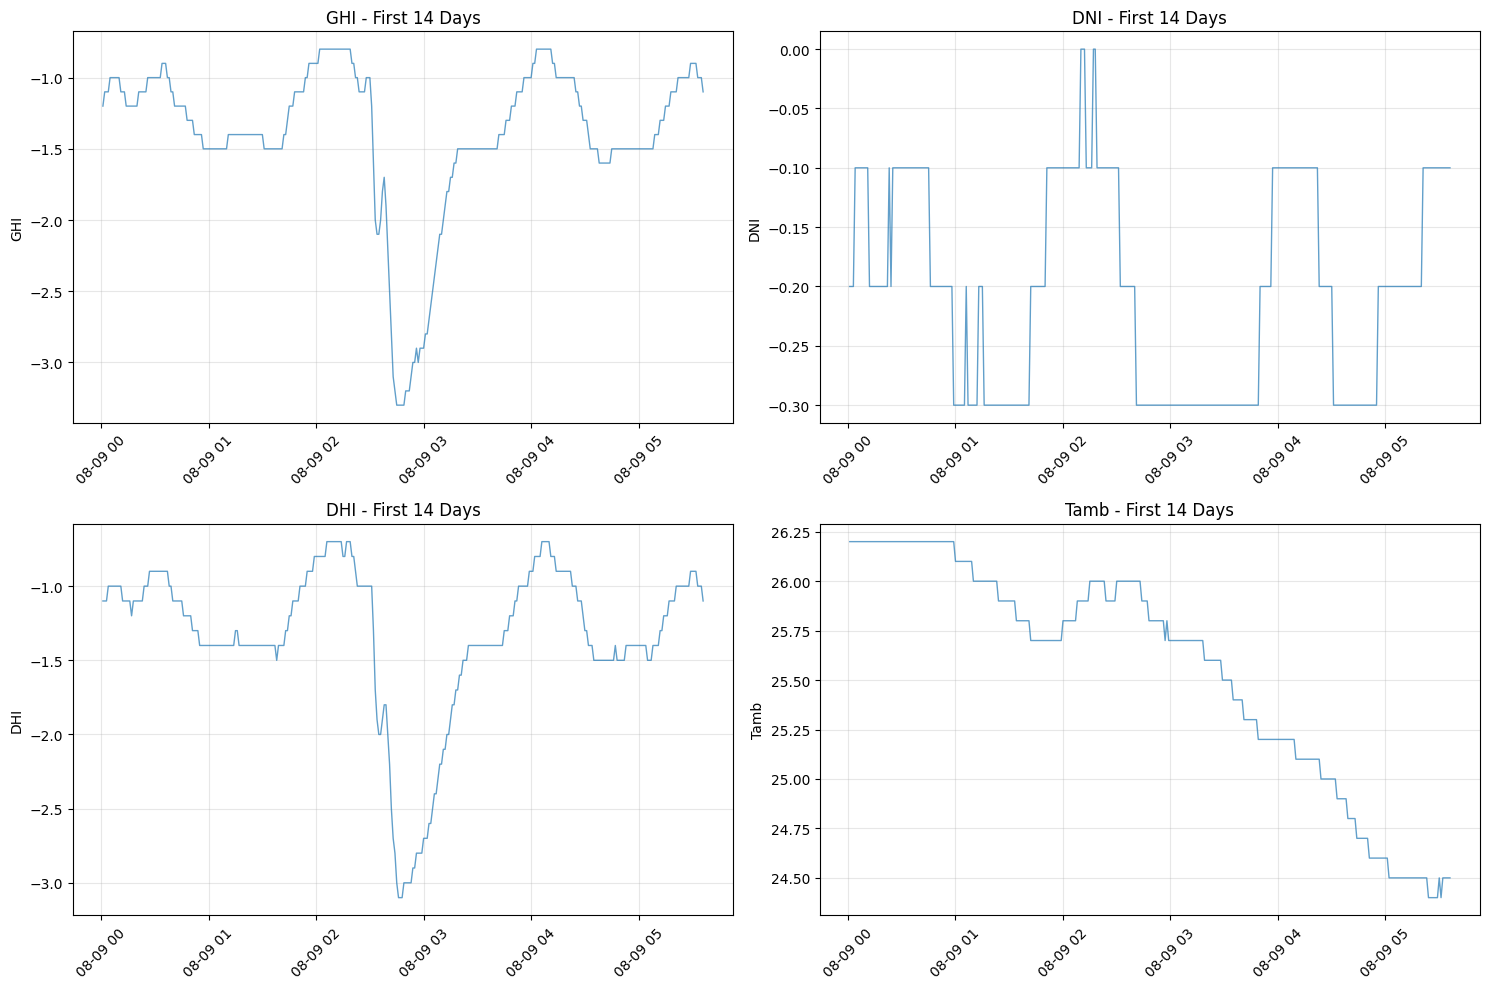

In [17]:
# Create time series plots for key variables
print("=== TIME SERIES PLOTS ===")

# Define variables to plot
ts_variables = ['GHI', 'DNI', 'DHI', 'Tamb']

# Set up the plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, variable in enumerate(ts_variables):
    if variable in df_clean.columns:
        # Plot first 7 days for clarity (adjust as needed)
        sample_data = df_clean.head(24*14)  # First 14 days for better visualization
        
        axes[i].plot(sample_data['Timestamp'], sample_data[variable], 
                    linewidth=1, alpha=0.7)
        axes[i].set_title(f'{variable} - First 14 Days')
        axes[i].set_ylabel(variable)
        axes[i].tick_params(axis='x', rotation=45)
        
        # Add grid for better readability
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== DAILY PATTERNS (BY HOUR) ===


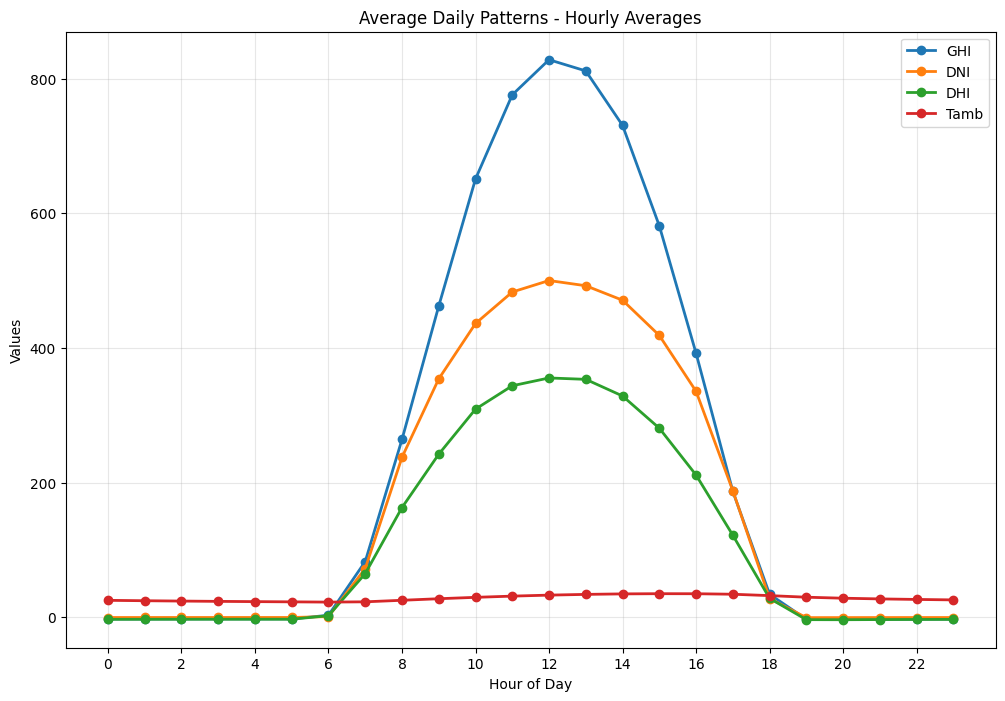

Key observations about daily patterns:
- GHI: Peaks at hour 12 (value: 828.21)
- DNI: Peaks at hour 12 (value: 500.17)
- DHI: Peaks at hour 12 (value: 355.43)
- Tamb: Peaks at hour 15 (value: 34.93)


In [18]:
# Analyze daily patterns by hour
print("=== DAILY PATTERNS (BY HOUR) ===")

# Calculate hourly averages
hourly_avg = df_clean.groupby('Hour')[ts_variables].mean()

plt.figure(figsize=(12, 8))
for i, variable in enumerate(ts_variables):
    if variable in hourly_avg.columns:
        plt.plot(hourly_avg.index, hourly_avg[variable], 
                marker='o', linewidth=2, label=variable)

plt.title('Average Daily Patterns - Hourly Averages')
plt.xlabel('Hour of Day')
plt.ylabel('Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24, 2))
plt.show()

print("Key observations about daily patterns:")
for variable in ts_variables:
    if variable in hourly_avg.columns:
        max_hour = hourly_avg[variable].idxmax()
        max_value = hourly_avg[variable].max()
        print(f"- {variable}: Peaks at hour {max_hour} (value: {max_value:.2f})")

=== SEASONAL PATTERNS (BY MONTH) ===


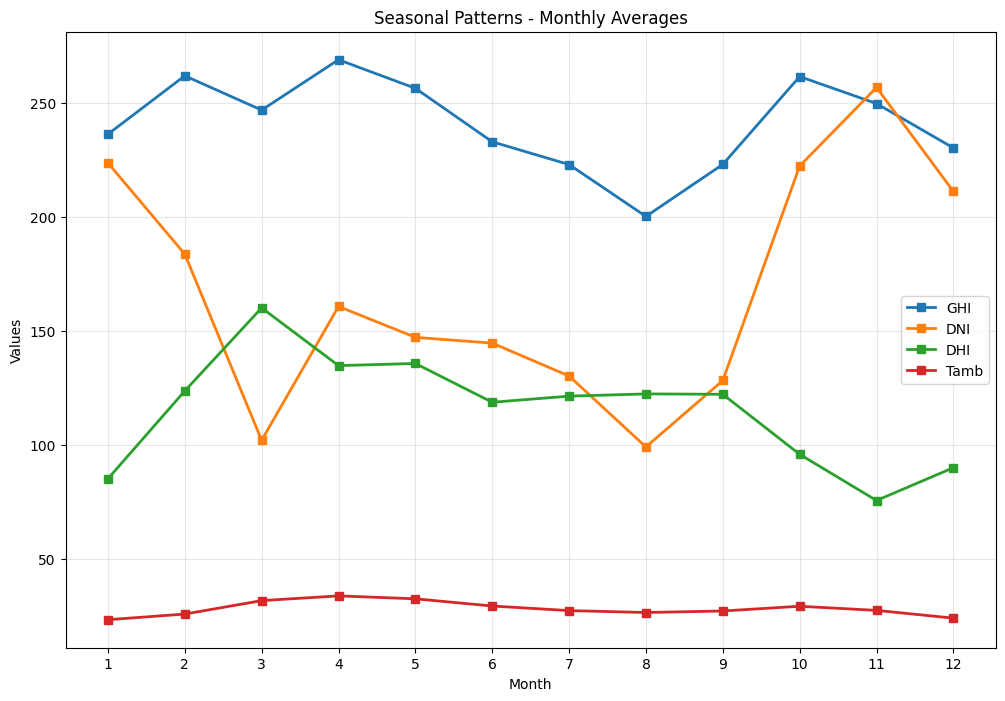

Key observations about seasonal patterns:
- GHI: Highest in month 4 (268.76), Lowest in month 8 (200.09)
- DNI: Highest in month 11 (256.60), Lowest in month 8 (99.05)
- DHI: Highest in month 3 (160.00), Lowest in month 11 (75.58)
- Tamb: Highest in month 4 (33.77), Lowest in month 1 (23.33)


In [19]:
# Analyze monthly/seasonal patterns
print("=== SEASONAL PATTERNS (BY MONTH) ===")

monthly_avg = df_clean.groupby('Month')[ts_variables].mean()

plt.figure(figsize=(12, 8))
for variable in ts_variables:
    if variable in monthly_avg.columns:
        plt.plot(monthly_avg.index, monthly_avg[variable], 
                marker='s', linewidth=2, label=variable)

plt.title('Seasonal Patterns - Monthly Averages')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))
plt.show()

print("Key observations about seasonal patterns:")
for variable in ts_variables:
    if variable in monthly_avg.columns:
        max_month = monthly_avg[variable].idxmax()
        max_value = monthly_avg[variable].max()
        min_month = monthly_avg[variable].idxmin()
        min_value = monthly_avg[variable].min()
        print(f"- {variable}: Highest in month {max_month} ({max_value:.2f}), "
              f"Lowest in month {min_month} ({min_value:.2f})")

In [20]:
# Detect potential anomalies
print("=== ANOMALY DETECTION ===")

# Find days with unusual patterns (e.g., very low GHI during daytime)
daytime_hours = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
daytime_data = df_clean[df_clean['Hour'].isin(daytime_hours)]

# Flag days with very low solar radiation during daytime
low_ghi_days = daytime_data[daytime_data['GHI'] < 10]  # Adjust threshold as needed

if not low_ghi_days.empty:
    print(f"Found {len(low_ghi_days)} records with very low GHI during daytime")
    print("These could be cloudy days, rainy days, or data issues")
    
    # Show the dates with lowest GHI
    low_ghi_summary = low_ghi_days.groupby(low_ghi_days['Timestamp'].dt.date).size()
    print("\nDates with most low-GHI records:")
    print(low_ghi_summary.sort_values(ascending=False).head(10))
else:
    print("No significant anomalies detected in daytime GHI values")

=== ANOMALY DETECTION ===
Found 30004 records with very low GHI during daytime
These could be cloudy days, rainy days, or data issues

Dates with most low-GHI records:
Timestamp
2021-08-18    253
2022-08-08    227
2022-07-22    189
2021-09-07    170
2021-09-13    168
2021-09-05    164
2021-08-17    162
2022-06-29    158
2022-01-03    147
2022-05-09    142
dtype: int64


# Cleaning impact analysis

In [21]:
# Prepare data for cleaning impact analysis
print("=== CLEANING IMPACT ANALYSIS ===")

# Check if ModA and ModB columns exist
sensor_columns = ['ModA', 'ModB']
available_sensors = [col for col in sensor_columns if col in df_clean.columns]

if not available_sensors:
    print("No ModA or ModB columns found in the dataset.")
    print("Available columns:", df_clean.columns.tolist())
else:
    print(f"Analyzing sensor columns: {available_sensors}")

=== CLEANING IMPACT ANALYSIS ===
Analyzing sensor columns: ['ModA', 'ModB']


In [22]:
# Create comprehensive cleaning flags
if available_sensors:
    # Flag for rows that had any outliers in key columns
    outlier_columns = [f'{col}_outlier' for col in available_columns if f'{col}_outlier' in df_clean.columns]
    
    if outlier_columns:
        df_clean['had_outlier'] = df_clean[outlier_columns].any(axis=1)
        
        # Flag for rows that had missing values (before imputation)
        # We'll recreate this by looking at which values were imputed
        df_clean['was_imputed'] = False
        for column in available_columns:
            # Find rows where original data was missing (we imputed them)
            if column in df.columns:  # Check if column exists in original
                original_missing = df[column].isna()
                df_clean.loc[original_missing, 'was_imputed'] = True
        
        # Combined cleaning flag
        df_clean['cleaning_category'] = 'Clean'
        df_clean.loc[df_clean['was_imputed'], 'cleaning_category'] = 'Imputed'
        df_clean.loc[df_clean['had_outlier'], 'cleaning_category'] = 'Outlier'
        df_clean.loc[df_clean['had_outlier'] & df_clean['was_imputed'], 'cleaning_category'] = 'Both'
        
        print("Cleaning categories created:")
        print(df_clean['cleaning_category'].value_counts())

Cleaning categories created:
cleaning_category
Clean      517860
Outlier      7740
Name: count, dtype: int64


In [23]:
# Compare sensor readings across cleaning categories
if available_sensors and 'cleaning_category' in df_clean.columns:
    print("\n=== SENSOR READINGS BY CLEANING CATEGORY ===")
    
    # Calculate averages by cleaning category
    sensor_summary = df_clean.groupby('cleaning_category')[available_sensors].mean()
    print("Average sensor readings by cleaning category:")
    print(sensor_summary)
    
    # Calculate percentage differences
    clean_avg = sensor_summary.loc['Clean'] if 'Clean' in sensor_summary.index else sensor_summary.iloc[0]
    
    print("\nPercentage difference from clean data:")
    for category in sensor_summary.index:
        if category != 'Clean':
            differences = ((sensor_summary.loc[category] - clean_avg) / clean_avg) * 100
            print(f"\n{category} vs Clean:")
            for sensor in available_sensors:
                print(f"  {sensor}: {differences[sensor]:+.2f}%")


=== SENSOR READINGS BY CLEANING CATEGORY ===
Average sensor readings by cleaning category:
                         ModA        ModB
cleaning_category                        
Clean              232.393310  225.026584
Outlier            517.343618  486.943256

Percentage difference from clean data:

Outlier vs Clean:
  ModA: +122.62%
  ModB: +116.39%



=== CLEANING IMPACT VISUALIZATION ===


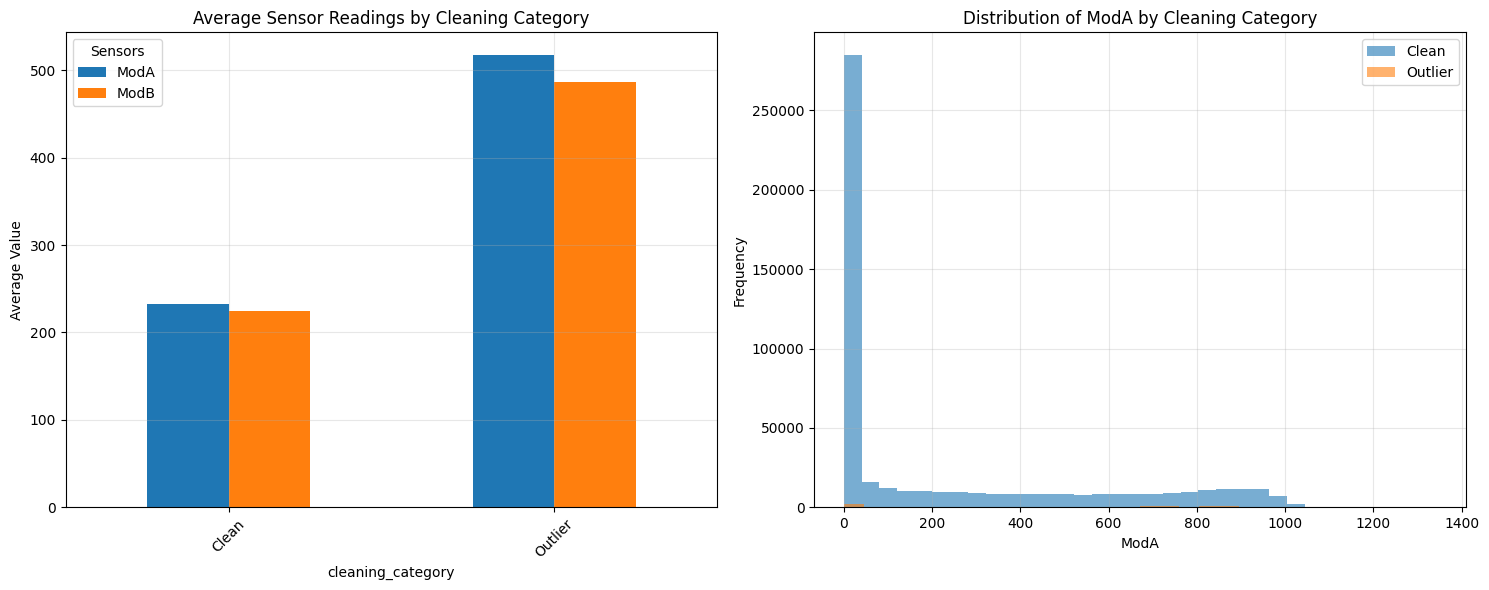

In [24]:
# Create visualization of cleaning impact
if available_sensors and 'cleaning_category' in df_clean.columns:
    print("\n=== CLEANING IMPACT VISUALIZATION ===")
    
    # Set up the plot
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Average values by cleaning category
    if len(available_sensors) > 0:
        sensor_summary.plot(kind='bar', ax=axes[0])
        axes[0].set_title('Average Sensor Readings by Cleaning Category')
        axes[0].set_ylabel('Average Value')
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].legend(title='Sensors')
        axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Distribution comparison for first sensor
    if len(available_sensors) > 0:
        first_sensor = available_sensors[0]
        categories = df_clean['cleaning_category'].unique()
        
        for category in categories:
            data = df_clean[df_clean['cleaning_category'] == category][first_sensor]
            axes[1].hist(data, alpha=0.6, label=category, bins=30)
        
        axes[1].set_title(f'Distribution of {first_sensor} by Cleaning Category')
        axes[1].set_xlabel(first_sensor)
        axes[1].set_ylabel('Frequency')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Correlation & Relationship analysis

In [25]:
# Prepare data for correlation analysis
print("=== CORRELATION ANALYSIS ===")

# Define variables for correlation analysis
correlation_vars = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WD']

# Check which variables exist in our dataset
available_corr_vars = [var for var in correlation_vars if var in df_clean.columns]
print(f"Variables available for correlation: {available_corr_vars}")

# Select only numeric columns for correlation
corr_data = df_clean[available_corr_vars].select_dtypes(include=[np.number])

print(f"Data shape for correlation: {corr_data.shape}")

=== CORRELATION ANALYSIS ===
Variables available for correlation: ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WD']
Data shape for correlation: (525600, 10)



=== CORRELATION HEATMAP ===


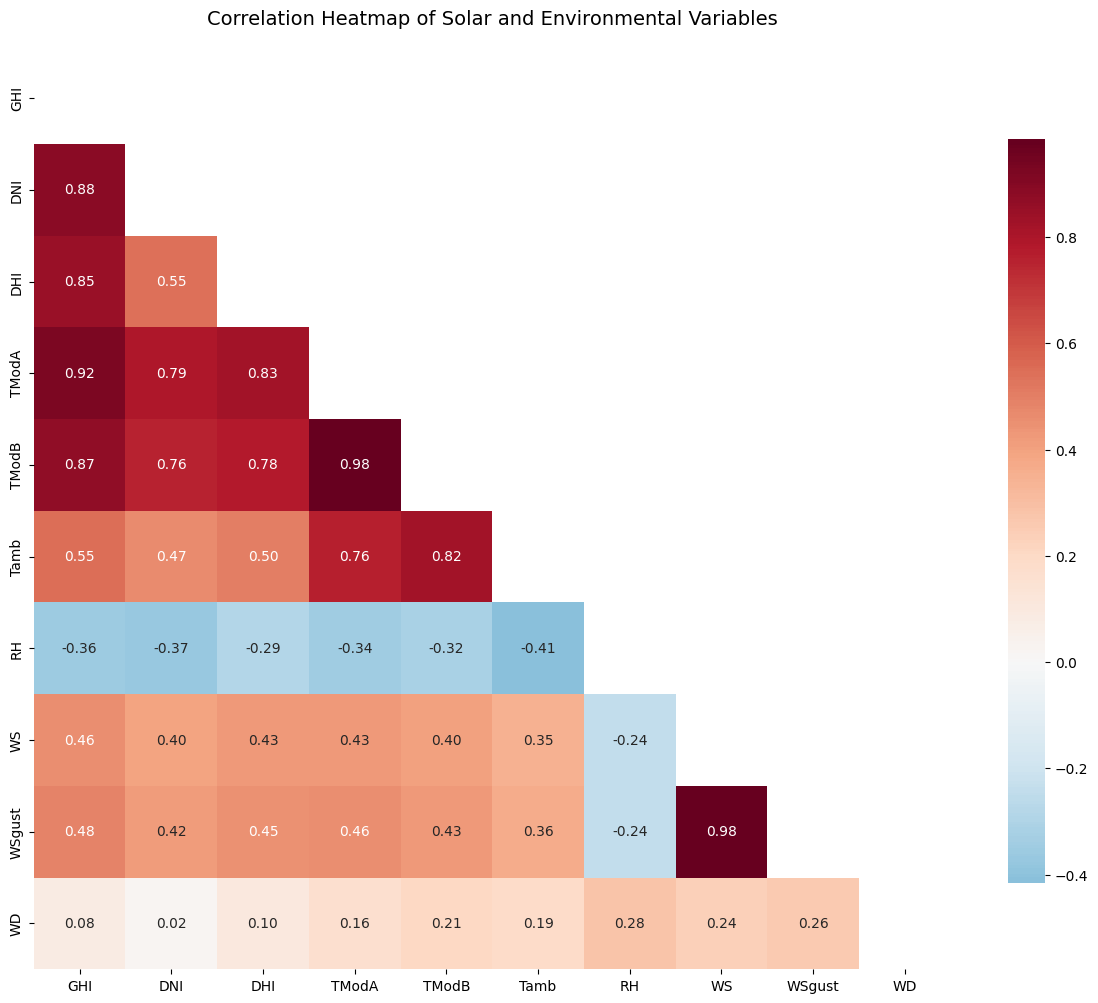

In [26]:
# Create correlation heatmap
print("\n=== CORRELATION HEATMAP ===")

plt.figure(figsize=(12, 10))

# Calculate correlation matrix
correlation_matrix = corr_data.corr()

# Create heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Heatmap of Solar and Environmental Variables', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

In [27]:
# Identify strongest correlations
print("\n=== STRONGEST CORRELATIONS ===")

# Find correlations stronger than threshold
strong_corr_threshold = 0.7
strong_correlations = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > strong_corr_threshold:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            strong_correlations.append((var1, var2, corr_value))

# Sort by absolute correlation strength
strong_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

print(f"Correlations stronger than |{strong_corr_threshold}|:")
for var1, var2, corr in strong_correlations:
    print(f"  {var1} vs {var2}: {corr:.3f}")


=== STRONGEST CORRELATIONS ===
Correlations stronger than |0.7|:
  WS vs WSgust: 0.985
  TModA vs TModB: 0.983
  GHI vs TModA: 0.920
  GHI vs DNI: 0.882
  GHI vs TModB: 0.874
  GHI vs DHI: 0.850
  DHI vs TModA: 0.825
  TModB vs Tamb: 0.823
  DNI vs TModA: 0.790
  DHI vs TModB: 0.778
  TModA vs Tamb: 0.762
  DNI vs TModB: 0.756



=== WIND VS SOLAR RADIATION SCATTER PLOTS ===


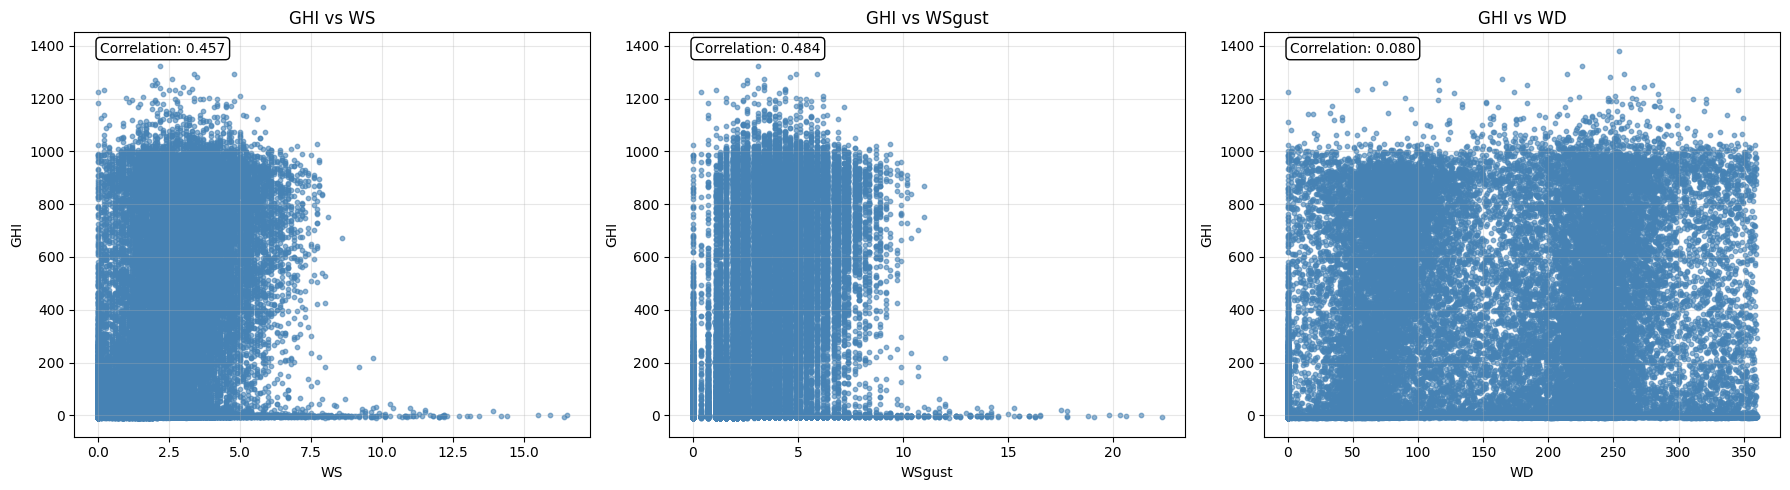

In [28]:
# Scatter plots: Wind variables vs GHI
print("\n=== WIND VS SOLAR RADIATION SCATTER PLOTS ===")

wind_vars = ['WS', 'WSgust', 'WD']
available_wind_vars = [var for var in wind_vars if var in df_clean.columns]

if available_wind_vars and 'GHI' in df_clean.columns:
    fig, axes = plt.subplots(1, len(available_wind_vars), figsize=(18, 5))
    
    if len(available_wind_vars) == 1:
        axes = [axes]
    
    for i, wind_var in enumerate(available_wind_vars):
        # Sample data for better visualization (every 10th point)
        sample_data = df_clean.iloc[::10]
        
        axes[i].scatter(sample_data[wind_var], sample_data['GHI'], 
                       alpha=0.6, s=10, color='steelblue')
        axes[i].set_xlabel(wind_var)
        axes[i].set_ylabel('GHI')
        axes[i].set_title(f'GHI vs {wind_var}')
        axes[i].grid(True, alpha=0.3)
        
        # Calculate correlation
        corr = df_clean[wind_var].corr(df_clean['GHI'])
        axes[i].text(0.05, 0.95, f'Correlation: {corr:.3f}', 
                    transform=axes[i].transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))
    
    plt.tight_layout()
    plt.show()


=== HUMIDITY RELATIONSHIPS ===


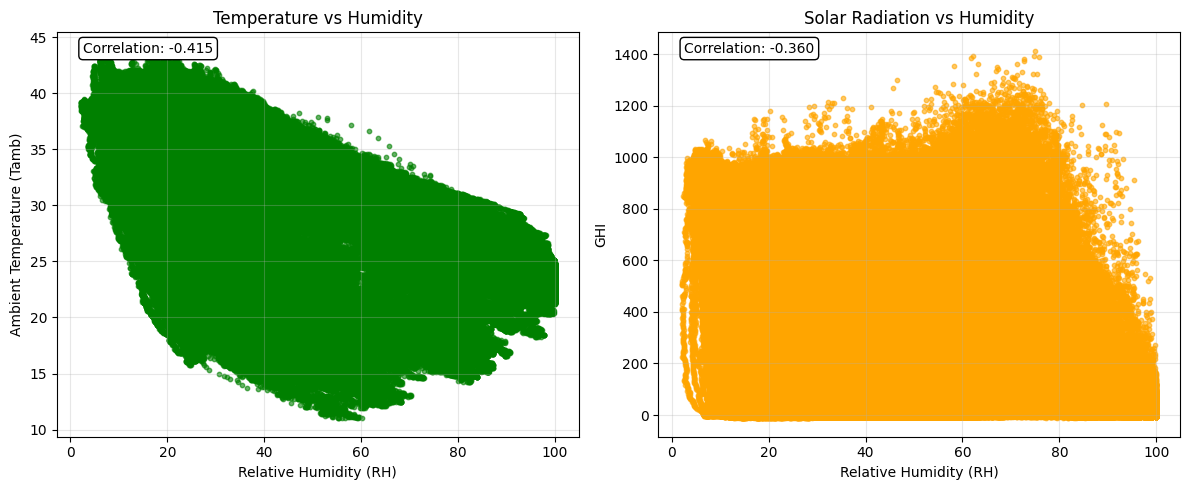

In [29]:
# Scatter plots: RH vs Temperature and GHI
print("\n=== HUMIDITY RELATIONSHIPS ===")

if 'RH' in df_clean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # RH vs Tamb
    if 'Tamb' in df_clean.columns:
        axes[0].scatter(df_clean['RH'], df_clean['Tamb'], alpha=0.6, s=10, color='green')
        axes[0].set_xlabel('Relative Humidity (RH)')
        axes[0].set_ylabel('Ambient Temperature (Tamb)')
        axes[0].set_title('Temperature vs Humidity')
        axes[0].grid(True, alpha=0.3)
        
        corr_rh_tamb = df_clean['RH'].corr(df_clean['Tamb'])
        axes[0].text(0.05, 0.95, f'Correlation: {corr_rh_tamb:.3f}', 
                    transform=axes[0].transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))
    
    # RH vs GHI
    if 'GHI' in df_clean.columns:
        axes[1].scatter(df_clean['RH'], df_clean['GHI'], alpha=0.6, s=10, color='orange')
        axes[1].set_xlabel('Relative Humidity (RH)')
        axes[1].set_ylabel('GHI')
        axes[1].set_title('Solar Radiation vs Humidity')
        axes[1].grid(True, alpha=0.3)
        
        corr_rh_ghi = df_clean['RH'].corr(df_clean['GHI'])
        axes[1].text(0.05, 0.95, f'Correlation: {corr_rh_ghi:.3f}', 
                    transform=axes[1].transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))
    
    plt.tight_layout()
    plt.show()

In [30]:
# Advanced correlation insights
print("\n=== CORRELATION INSIGHTS ===")

print("1. SOLAR RADIATION CORRELATIONS:")
solar_vars = ['GHI', 'DNI', 'DHI']
for var in solar_vars:
    if var in df_clean.columns:
        corr_with_tamb = df_clean[var].corr(df_clean['Tamb']) if 'Tamb' in df_clean.columns else None
        corr_with_rh = df_clean[var].corr(df_clean['RH']) if 'RH' in df_clean.columns else None
        
        print(f"   {var}:")
        if corr_with_tamb is not None:
            print(f"     - Temperature correlation: {corr_with_tamb:.3f}")
        if corr_with_rh is not None:
            print(f"     - Humidity correlation: {corr_with_rh:.3f}")

print("\n2. ENVIRONMENTAL RELATIONSHIPS:")
if 'Tamb' in df_clean.columns and 'RH' in df_clean.columns:
    corr_tamb_rh = df_clean['Tamb'].corr(df_clean['RH'])
    print(f"   Temperature vs Humidity: {corr_tamb_rh:.3f}")
    if corr_tamb_rh < -0.5:
        print("     → Strong negative relationship: Higher temps = Lower humidity")
    elif corr_tamb_rh > 0.5:
        print("     → Strong positive relationship: Higher temps = Higher humidity")
    else:
        print("     → Weak relationship between temperature and humidity")

print("\n3. WIND IMPACT ON SOLAR:")
if 'WS' in df_clean.columns and 'GHI' in df_clean.columns:
    corr_ws_ghi = df_clean['WS'].corr(df_clean['GHI'])
    print(f"   Wind Speed vs GHI: {corr_ws_ghi:.3f}")
    if abs(corr_ws_ghi) > 0.3:
        print("     → Noticeable relationship between wind and solar radiation")
    else:
        print("     → Little direct relationship between wind and solar radiation")


=== CORRELATION INSIGHTS ===
1. SOLAR RADIATION CORRELATIONS:
   GHI:
     - Temperature correlation: 0.548
     - Humidity correlation: -0.360
   DNI:
     - Temperature correlation: 0.468
     - Humidity correlation: -0.373
   DHI:
     - Temperature correlation: 0.504
     - Humidity correlation: -0.285

2. ENVIRONMENTAL RELATIONSHIPS:
   Temperature vs Humidity: -0.415
     → Weak relationship between temperature and humidity

3. WIND IMPACT ON SOLAR:
   Wind Speed vs GHI: 0.457
     → Noticeable relationship between wind and solar radiation


In [31]:
# Correlation interpretation guide
print("\n=== CORRELATION INTERPRETATION GUIDE ===")
print("Correlation strength guidelines:")
print("  ±0.8 to ±1.0: Very strong relationship")
print("  ±0.6 to ±0.8: Strong relationship") 
print("  ±0.4 to ±0.6: Moderate relationship")
print("  ±0.2 to ±0.4: Weak relationship")
print("  ±0.0 to ±0.2: Very weak or no relationship")
print("\nNote: Correlation ≠ Causation!")


=== CORRELATION INTERPRETATION GUIDE ===
Correlation strength guidelines:
  ±0.8 to ±1.0: Very strong relationship
  ±0.6 to ±0.8: Strong relationship
  ±0.4 to ±0.6: Moderate relationship
  ±0.2 to ±0.4: Weak relationship
  ±0.0 to ±0.2: Very weak or no relationship

Note: Correlation ≠ Causation!


# Wind and Distribution Analysis

In [32]:
# Check wind data availability
print("=== WIND DATA ANALYSIS ===")

wind_vars = ['WS', 'WD', 'WSgust']
available_wind_vars = [var for var in wind_vars if var in df_clean.columns]

print(f"Available wind variables: {available_wind_vars}")

if 'WS' in df_clean.columns and 'WD' in df_clean.columns:
    print(f"Wind Speed (WS) range: {df_clean['WS'].min():.2f} to {df_clean['WS'].max():.2f}")
    print(f"Wind Direction (WD) range: {df_clean['WD'].min():.2f} to {df_clean['WD'].max():.2f}")

=== WIND DATA ANALYSIS ===
Available wind variables: ['WS', 'WD', 'WSgust']
Wind Speed (WS) range: 0.00 to 19.50
Wind Direction (WD) range: 0.00 to 360.00


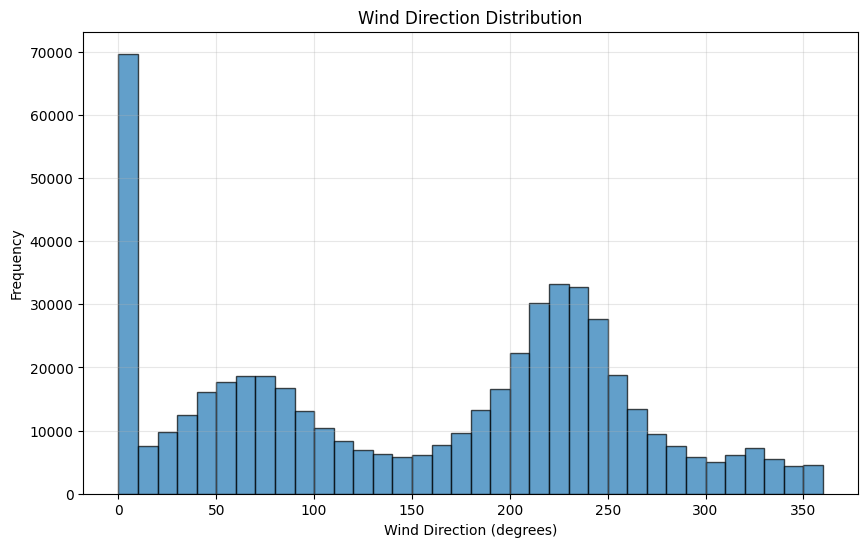

In [40]:
# WIND ROSE
if 'WS' in df_clean.columns and 'WD' in df_clean.columns:
    # Simple wind rose using plotly (if available) or basic matplotlib
    try:
        import plotly.graph_objects as go
        import plotly.express as px
        
        # Sample data for wind rose
        sample_wind = df_clean[['WS', 'WD']].dropna().iloc[::10]  # Sample every 10th point
        
        fig = px.bar_polar(sample_wind, r='WS', theta='WD', 
                          color='WS', template='plotly_white',
                          color_continuous_scale='Viridis')
        fig.update_layout(title='Wind Rose - Benin Site')
        fig.show()
        
    except ImportError:
        # Fallback to simple wind direction histogram
        plt.figure(figsize=(10, 6))
        plt.hist(df_clean['WD'].dropna(), bins=36, alpha=0.7, edgecolor='black')
        plt.xlabel('Wind Direction (degrees)')
        plt.ylabel('Frequency')
        plt.title('Wind Direction Distribution')
        plt.grid(True, alpha=0.3)
        plt.show()


=== VARIABLE DISTRIBUTIONS ===

GHI Distribution Statistics:
  Mean: 240.56
  Median: 1.80
  Std Dev: 331.13
  Skewness: 1.03
  Kurtosis: -0.46

WS Distribution Statistics:
  Mean: 2.12
  Median: 1.90
  Std Dev: 1.60
  Skewness: 0.87
  Kurtosis: 1.58


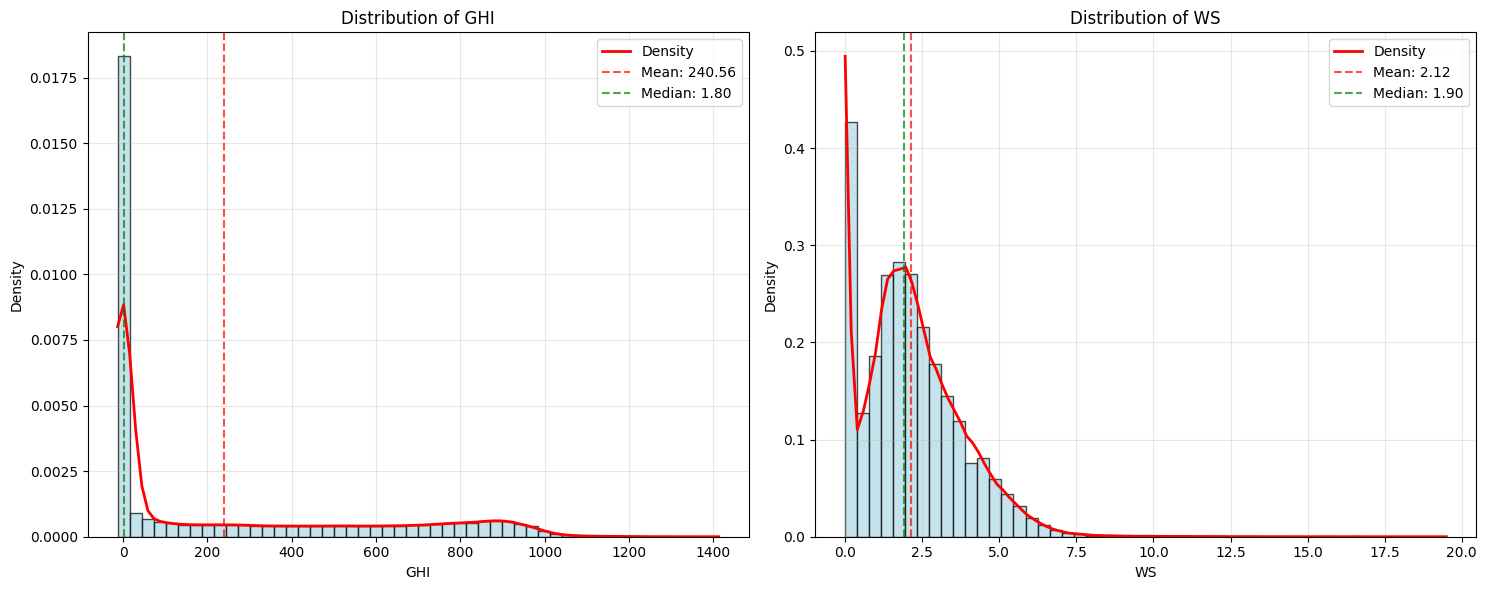

In [36]:
# Create distribution histograms
print("\n=== VARIABLE DISTRIBUTIONS ===")

# Variables to plot
dist_vars = ['GHI', 'WS']  # GHI + one other variable
available_dist_vars = [var for var in dist_vars if var in df_clean.columns]

fig, axes = plt.subplots(1, len(available_dist_vars), figsize=(15, 6))

if len(available_dist_vars) == 1:
    axes = [axes]

for i, variable in enumerate(available_dist_vars):
    # Create histogram
    axes[i].hist(df_clean[variable], bins=50, alpha=0.7, color='lightblue', edgecolor='black', density=True)
    
    # Add distribution curve
    from scipy.stats import gaussian_kde
    data = df_clean[variable].dropna()
    kde = gaussian_kde(data)
    x_range = np.linspace(data.min(), data.max(), 100)
    axes[i].plot(x_range, kde(x_range), color='red', linewidth=2, label='Density')
    
    # Add statistics
    mean_val = data.mean()
    median_val = data.median()
    std_val = data.std()
    
    axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Median: {median_val:.2f}')
    
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'Distribution of {variable}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)
    
    # Print statistics
    print(f"\n{variable} Distribution Statistics:")
    print(f"  Mean: {mean_val:.2f}")
    print(f"  Median: {median_val:.2f}")
    print(f"  Std Dev: {std_val:.2f}")
    print(f"  Skewness: {data.skew():.2f}")
    print(f"  Kurtosis: {data.kurtosis():.2f}")

plt.tight_layout()
plt.show()

In [37]:
# Wind pattern insights
print("\n=== WIND PATTERN INSIGHTS ===")

if 'WS' in df_clean.columns:
    # Basic wind statistics
    ws_stats = df_clean['WS'].describe()
    print("Wind Speed Statistics:")
    print(f"  Average: {ws_stats['mean']:.2f} m/s")
    print(f"  Maximum: {ws_stats['max']:.2f} m/s")
    print(f"  Standard Deviation: {ws_stats['std']:.2f} m/s")
    
    # Wind speed categories
    calm_days = len(df_clean[df_clean['WS'] < 1]) / len(df_clean) * 100
    windy_days = len(df_clean[df_clean['WS'] > 5]) / len(df_clean) * 100
    
    print(f"\nWind Conditions:")
    print(f"  Calm conditions (<1 m/s): {calm_days:.1f}% of time")
    print(f"  Windy conditions (>5 m/s): {windy_days:.1f}% of time")
    
    if 'Hour' in df_clean.columns:
        # Find windiest hour
        hourly_ws = df_clean.groupby('Hour')['WS'].mean()
        windiest_hour = hourly_ws.idxmax()
        calmest_hour = hourly_ws.idxmin()
        
        print(f"  Windiest time: {windiest_hour}:00 ({hourly_ws.max():.2f} m/s)")
        print(f"  Calmest time: {calmest_hour}:00 ({hourly_ws.min():.2f} m/s)")

if 'WD' in df_clean.columns and 'wind_direction_cat' in df_clean.columns:
    # Dominant wind direction
    dominant_dir = df_clean['wind_direction_cat'].value_counts().index[0]
    dominant_percent = df_clean['wind_direction_cat'].value_counts().iloc[0] / len(df_clean) * 100
    
    print(f"  Dominant wind direction: {dominant_dir} ({dominant_percent:.1f}% of time)")


=== WIND PATTERN INSIGHTS ===
Wind Speed Statistics:
  Average: 2.12 m/s
  Maximum: 19.50 m/s
  Standard Deviation: 1.60 m/s

Wind Conditions:
  Calm conditions (<1 m/s): 24.8% of time
  Windy conditions (>5 m/s): 5.0% of time
  Windiest time: 10:00 (3.57 m/s)
  Calmest time: 21:00 (1.36 m/s)
  Dominant wind direction: N (15.2% of time)


In [38]:
# GHI distribution insights
print("\n=== SOLAR RADIATION INSIGHTS ===")

if 'GHI' in df_clean.columns:
    ghi_stats = df_clean['GHI'].describe()
    
    print("Global Horizontal Irradiance (GHI) Analysis:")
    print(f"  Average: {ghi_stats['mean']:.2f} W/m²")
    print(f"  Maximum: {ghi_stats['max']:.2f} W/m²")
    print(f"  Variability (std): {ghi_stats['std']:.2f} W/m²")
    
    # Solar resource assessment
    high_radiation = len(df_clean[df_clean['GHI'] > 500]) / len(df_clean) * 100
    low_radiation = len(df_clean[df_clean['GHI'] < 100]) / len(df_clean) * 100
    
    print(f"\nSolar Resource Quality:")
    print(f"  High radiation (>500 W/m²): {high_radiation:.1f}% of time")
    print(f"  Low radiation (<100 W/m²): {low_radiation:.1f}% of time")
    
    # Distribution type
    skewness = df_clean['GHI'].skew()
    if skewness > 1:
        print("  Distribution: Highly right-skewed (many low values, few high peaks)")
    elif skewness > 0.5:
        print("  Distribution: Moderately right-skewed")
    else:
        print("  Distribution: Relatively symmetric")


=== SOLAR RADIATION INSIGHTS ===
Global Horizontal Irradiance (GHI) Analysis:
  Average: 240.56 W/m²
  Maximum: 1413.00 W/m²
  Variability (std): 331.13 W/m²

Solar Resource Quality:
  High radiation (>500 W/m²): 24.3% of time
  Low radiation (<100 W/m²): 58.3% of time
  Distribution: Highly right-skewed (many low values, few high peaks)


# Temperature analysis

In [42]:
# Check required data availability
print("=== TEMPERATURE AND HUMIDITY ANALYSIS ===")

required_vars = ['Tamb', 'RH', 'GHI']
available_vars = [var for var in required_vars if var in df_clean.columns]

print(f"Available variables: {available_vars}")

if len(available_vars) >= 2:
    # Basic statistics
    for var in available_vars:
        if var in df_clean.columns:
            stats = df_clean[var].describe()
            print(f"\n{var} Statistics:")
            print(f"  Mean: {stats['mean']:.2f}")
            print(f"  Min: {stats['min']:.2f}")
            print(f"  Max: {stats['max']:.2f}")
            print(f"  Std: {stats['std']:.2f}")

=== TEMPERATURE AND HUMIDITY ANALYSIS ===
Available variables: ['Tamb', 'RH', 'GHI']

Tamb Statistics:
  Mean: 28.18
  Min: 11.00
  Max: 43.80
  Std: 5.92

RH Statistics:
  Mean: 54.49
  Min: 2.10
  Max: 100.00
  Std: 28.07

GHI Statistics:
  Mean: 240.56
  Min: -12.90
  Max: 1413.00
  Std: 331.13



=== HUMIDITY vs TEMPERATURE RELATIONSHIP ===


/tmp/ipykernel_58974/3180185354.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=humidity_labels)


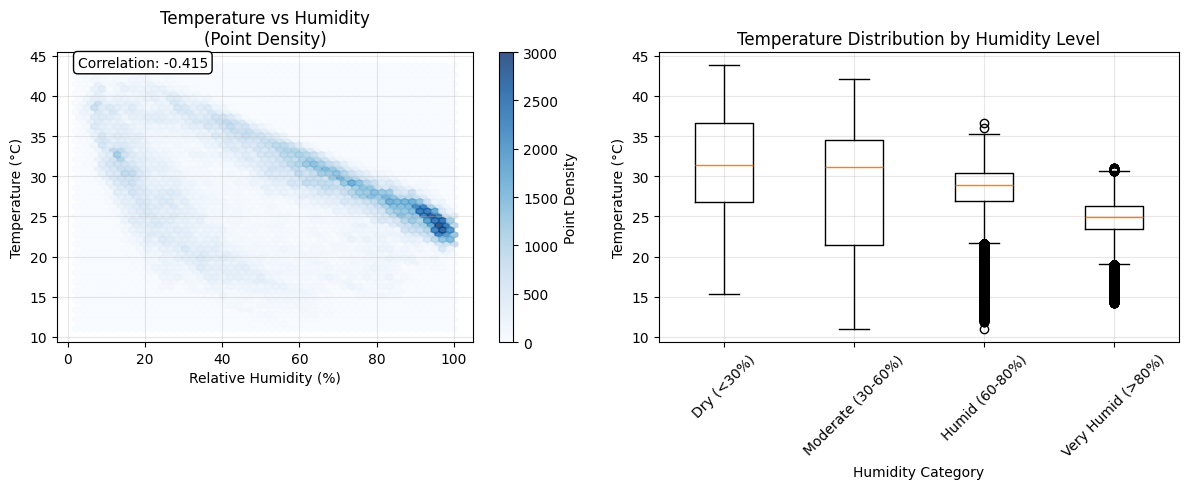

In [43]:
# Analyze RH vs Temperature relationship
print("\n=== HUMIDITY vs TEMPERATURE RELATIONSHIP ===")

if 'Tamb' in df_clean.columns and 'RH' in df_clean.columns:
    # Create scatter plot with density
    plt.figure(figsize=(12, 5))
    
    # Plot 1: Scatter plot with transparency
    plt.subplot(1, 2, 1)
    plt.hexbin(df_clean['RH'], df_clean['Tamb'], gridsize=50, cmap='Blues', alpha=0.8)
    plt.colorbar(label='Point Density')
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature vs Humidity\n(Point Density)')
    plt.grid(True, alpha=0.3)
    
    # Calculate correlation
    corr_rh_tamb = df_clean['RH'].corr(df_clean['Tamb'])
    plt.text(0.05, 0.95, f'Correlation: {corr_rh_tamb:.3f}', 
             transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))
    
    # Plot 2: Box plot by humidity ranges
    plt.subplot(1, 2, 2)
    
    # Create humidity categories
    humidity_bins = [0, 30, 60, 80, 100]  # Dry, Moderate, Humid, Very Humid
    humidity_labels = ['Dry (<30%)', 'Moderate (30-60%)', 'Humid (60-80%)', 'Very Humid (>80%)']
    
    df_clean['humidity_category'] = pd.cut(df_clean['RH'], bins=humidity_bins, 
                                          labels=humidity_labels, include_lowest=True)
    
    # Create box plot
    box_data = []
    for category in humidity_labels:
        if category in df_clean['humidity_category'].cat.categories:
            temp_data = df_clean[df_clean['humidity_category'] == category]['Tamb'].dropna()
            box_data.append(temp_data)
    
    plt.boxplot(box_data, labels=humidity_labels)
    plt.xlabel('Humidity Category')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature Distribution by Humidity Level')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


=== HUMIDITY vs SOLAR RADIATION RELATIONSHIP ===


/tmp/ipykernel_58974/2665122978.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ghi_by_humidity = df_clean.groupby('humidity_category')['GHI'].mean()


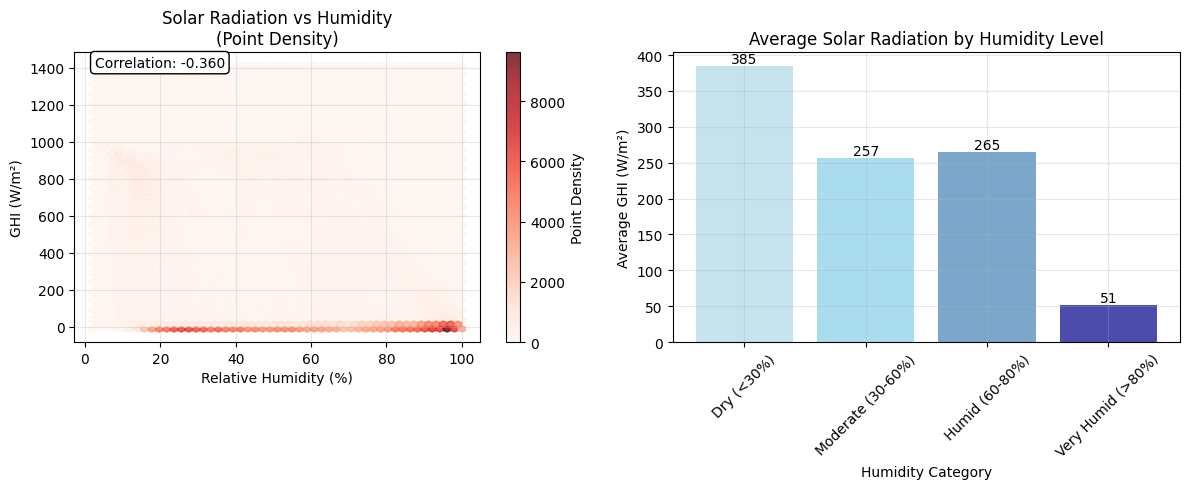

In [44]:
# Analyze RH vs Solar Radiation relationship
print("\n=== HUMIDITY vs SOLAR RADIATION RELATIONSHIP ===")

if 'RH' in df_clean.columns and 'GHI' in df_clean.columns:
    plt.figure(figsize=(12, 5))
    
    # Plot 1: Scatter plot
    plt.subplot(1, 2, 1)
    plt.hexbin(df_clean['RH'], df_clean['GHI'], gridsize=50, cmap='Reds', alpha=0.8)
    plt.colorbar(label='Point Density')
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('GHI (W/m²)')
    plt.title('Solar Radiation vs Humidity\n(Point Density)')
    plt.grid(True, alpha=0.3)
    
    # Calculate correlation
    corr_rh_ghi = df_clean['RH'].corr(df_clean['GHI'])
    plt.text(0.05, 0.95, f'Correlation: {corr_rh_ghi:.3f}', 
             transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))
    
    # Plot 2: Average GHI by humidity category
    plt.subplot(1, 2, 2)
    
    if 'humidity_category' in df_clean.columns:
        ghi_by_humidity = df_clean.groupby('humidity_category')['GHI'].mean()
        
        bars = plt.bar(range(len(ghi_by_humidity)), ghi_by_humidity.values, 
                      color=['lightblue', 'skyblue', 'steelblue', 'darkblue'], alpha=0.7)
        plt.xlabel('Humidity Category')
        plt.ylabel('Average GHI (W/m²)')
        plt.title('Average Solar Radiation by Humidity Level')
        plt.xticks(range(len(ghi_by_humidity)), ghi_by_humidity.index, rotation=45)
        plt.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.0f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Bubble chart analysis

In [46]:
# Prepare data for bubble chart
print("=== BUBBLE CHART ANALYSIS ===")

# Check available variables for bubble chart
bubble_vars = ['GHI', 'Tamb', 'RH', 'BP']
available_bubble_vars = [var for var in bubble_vars if var in df_clean.columns]

print(f"Available variables for bubble chart: {available_bubble_vars}")

if len(available_bubble_vars) >= 3:
    # Sample data for better visualization (every 20th point)
    sample_size = min(500, len(df_clean))
    bubble_data = df_clean.iloc[::max(1, len(df_clean)//sample_size)].copy()
    
    print(f"Using {len(bubble_data)} data points for bubble chart visualization")

=== BUBBLE CHART ANALYSIS ===
Available variables for bubble chart: ['GHI', 'Tamb', 'RH', 'BP']
Using 501 data points for bubble chart visualization



=== BUBBLE CHART 1: GHI vs Temperature (Bubble Size = RH) ===


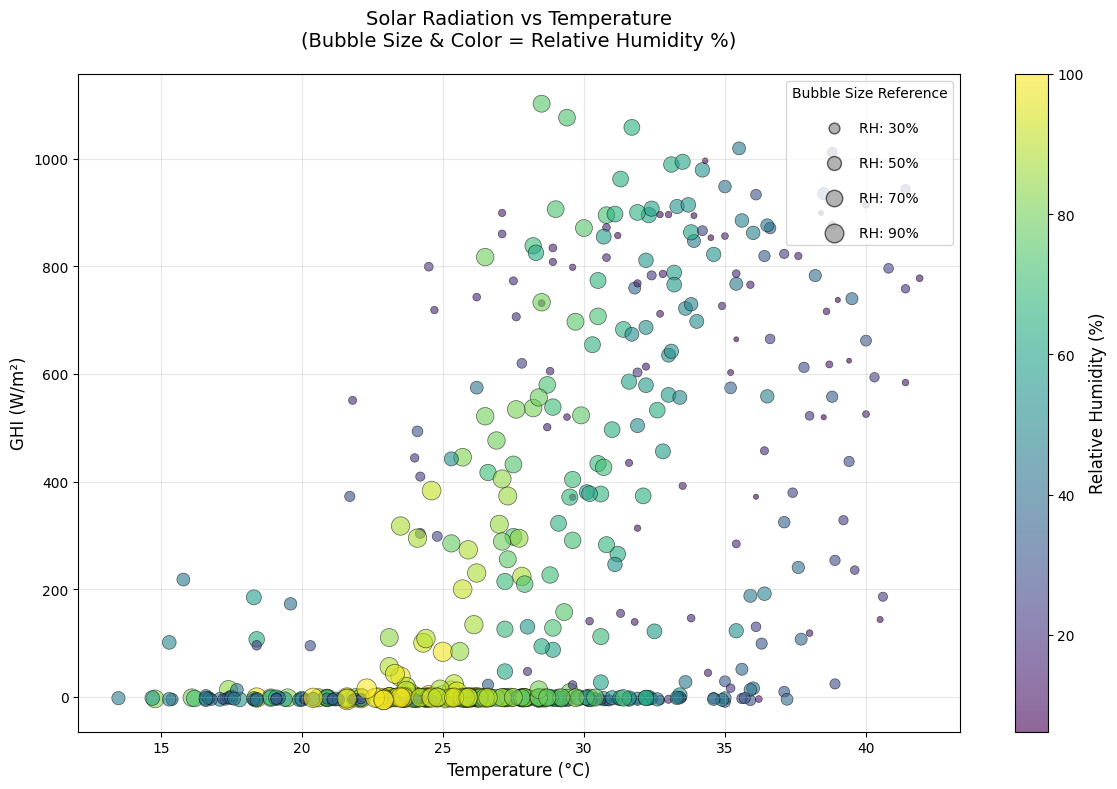

Bubble Chart Insights:
• Each bubble represents a measurement point
• X-axis: Ambient Temperature
• Y-axis: Global Horizontal Irradiance (GHI)
• Bubble Size & Color: Relative Humidity (%)
• Look for clusters and patterns in the data


In [49]:
# Create Bubble Chart: GHI vs Temperature with Humidity
print("\n=== BUBBLE CHART 1: GHI vs Temperature (Bubble Size = RH) ===")

if 'GHI' in df_clean.columns and 'Tamb' in df_clean.columns and 'RH' in df_clean.columns:
    plt.figure(figsize=(12, 8))
    
    # Create bubble chart
    scatter = plt.scatter(bubble_data['Tamb'], bubble_data['GHI'], 
                         s=bubble_data['RH']*2,  # Scale bubble size
                         c=bubble_data['RH'],     # Color by humidity
                         cmap='viridis', 
                         alpha=0.6, 
                         edgecolors='black', 
                         linewidth=0.5)
    
    # Customize the plot
    plt.xlabel('Temperature (°C)', fontsize=12)
    plt.ylabel('GHI (W/m²)', fontsize=12)
    plt.title('Solar Radiation vs Temperature\n(Bubble Size & Color = Relative Humidity %)', 
              fontsize=14, pad=20)
    
    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Relative Humidity (%)', fontsize=12)
    
    # Add grid
    plt.grid(True, alpha=0.3)
    
    # Add bubble size legend
    rh_values = [30, 50, 70, 90]  # Example RH values for legend
    for rh in rh_values:
        plt.scatter([], [], s=rh*2, c='gray', alpha=0.6, 
                   label=f'RH: {rh}%', edgecolors='black')
    
    plt.legend(scatterpoints=1, frameon=True, labelspacing=1.5, 
               title='Bubble Size Reference', loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    # Analyze patterns
    print("Bubble Chart Insights:")
    print("• Each bubble represents a measurement point")
    print("• X-axis: Ambient Temperature")
    print("• Y-axis: Global Horizontal Irradiance (GHI)")
    print("• Bubble Size & Color: Relative Humidity (%)")
    print("• Look for clusters and patterns in the data")


=== BUBBLE CHART 2: GHI vs Temperature (Bubble Size = BP) ===


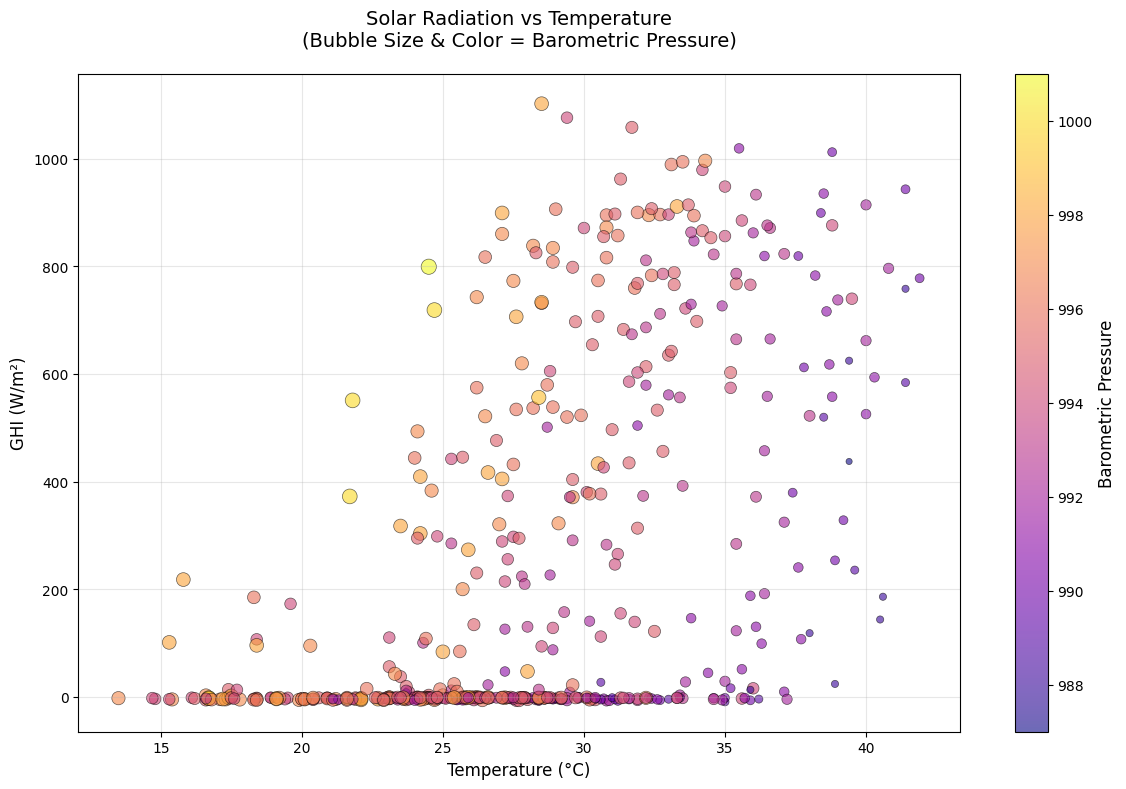

Barometric Pressure Range:
  Min: 987.00
  Max: 1001.00
  Mean: 994.17


In [48]:
# Create Bubble Chart: GHI vs Temperature with Barometric Pressure
print("\n=== BUBBLE CHART 2: GHI vs Temperature (Bubble Size = BP) ===")

if 'GHI' in df_clean.columns and 'Tamb' in df_clean.columns and 'BP' in df_clean.columns:
    plt.figure(figsize=(12, 8))
    
    # Normalize BP for better bubble size visualization
    bp_min = bubble_data['BP'].min()
    bp_max = bubble_data['BP'].max()
    bubble_size = (bubble_data['BP'] - bp_min) / (bp_max - bp_min) * 100 + 20
    
    # Create bubble chart
    scatter = plt.scatter(bubble_data['Tamb'], bubble_data['GHI'], 
                         s=bubble_size,           # Scaled bubble size
                         c=bubble_data['BP'],     # Color by pressure
                         cmap='plasma', 
                         alpha=0.6, 
                         edgecolors='black', 
                         linewidth=0.5)
    
    # Customize the plot
    plt.xlabel('Temperature (°C)', fontsize=12)
    plt.ylabel('GHI (W/m²)', fontsize=12)
    plt.title('Solar Radiation vs Temperature\n(Bubble Size & Color = Barometric Pressure)', 
              fontsize=14, pad=20)
    
    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Barometric Pressure', fontsize=12)
    
    # Add grid
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("Barometric Pressure Range:")
    print(f"  Min: {bp_min:.2f}")
    print(f"  Max: {bp_max:.2f}")
    print(f"  Mean: {bubble_data['BP'].mean():.2f}")

# Final summary

In [52]:
# Final Summary for Benin EDA
print("\n" + "="*60)
print(" BENIN EDA COMPLETED SUCCESSFULLY!")
print("="*60)

print("\n ANALYSIS COMPLETED:")
completed_analyses = [
    "✓ Data Loading & Initial Exploration",
    "✓ Missing Values & Outlier Detection", 
    "✓ Data Cleaning & Export",
    "✓ Time Series Analysis",
    "✓ Cleaning Impact Assessment",
    "✓ Correlation & Relationship Analysis",
    "✓ Wind & Distribution Analysis",
    "✓ Temperature-Humidity Analysis",
    "✓ Bubble Chart Visualization"
]

for analysis in completed_analyses:
    print(f"  {analysis}")










 BENIN EDA COMPLETED SUCCESSFULLY!

 ANALYSIS COMPLETED:
  ✓ Data Loading & Initial Exploration
  ✓ Missing Values & Outlier Detection
  ✓ Data Cleaning & Export
  ✓ Time Series Analysis
  ✓ Cleaning Impact Assessment
  ✓ Correlation & Relationship Analysis
  ✓ Wind & Distribution Analysis
  ✓ Temperature-Humidity Analysis
  ✓ Bubble Chart Visualization


In [54]:
# Export notebook state for reporting
print("\n=== EXPORTING ANALYSIS METRICS ===")

# Create summary statistics for reporting
analysis_metrics = {
    'total_records': len(df_clean),
    'analysis_period_days': (df_clean['Timestamp'].max() - df_clean['Timestamp'].min()).days,
    'data_quality_score': (len(df_clean) - df_clean.isna().sum().sum()) / len(df_clean) * 100,
    'avg_ghi': df_clean['GHI'].mean() if 'GHI' in df_clean.columns else None,
    'avg_temperature': df_clean['Tamb'].mean() if 'Tamb' in df_clean.columns else None,
    'avg_humidity': df_clean['RH'].mean() if 'RH' in df_clean.columns else None,
}

print("Analysis Metrics for Reporting:")
for metric, value in analysis_metrics.items():
    if value is not None:
        if isinstance(value, float):
            print(f"  {metric.replace('_', ' ').title()}: {value:.2f}")
        else:
            print(f"  {metric.replace('_', ' ').title()}: {value}")



=== EXPORTING ANALYSIS METRICS ===
Analysis Metrics for Reporting:
  Total Records: 525600
  Analysis Period Days: 364
  Data Quality Score: 0.00
  Avg Ghi: 240.56
  Avg Temperature: 28.18
  Avg Humidity: 54.49
